In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import hashashin
from hashashin.lsh_tests import compute_matrices, print_similarity_matrix, compute_metrics

BINARY_DIR = os.path.join(os.path.dirname(hashashin.__file__), 'binary_data')

%load_ext autoreload
%autoreload 2

In [18]:
def show_similarity_matrix(mat, labels, title=None, font_scale=0.7, figsize=(14, 14)):
    if isinstance(mat, list):
        mat = np.array(mat)
    if isinstance(labels, list):
        labels = np.array(labels)
    sns.set(font_scale=font_scale, rc={'figure.figsize':figsize, 'axes.titlesize': 20})
    sns.heatmap(mat, xticklabels=labels, yticklabels=labels, cmap='Blues', annot=True).set(title=title)

In [54]:
minhash_similarities, jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=False)
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 131.86it/s]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 129.70it/s]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [00:11<00:00, 42.29it/s]

Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


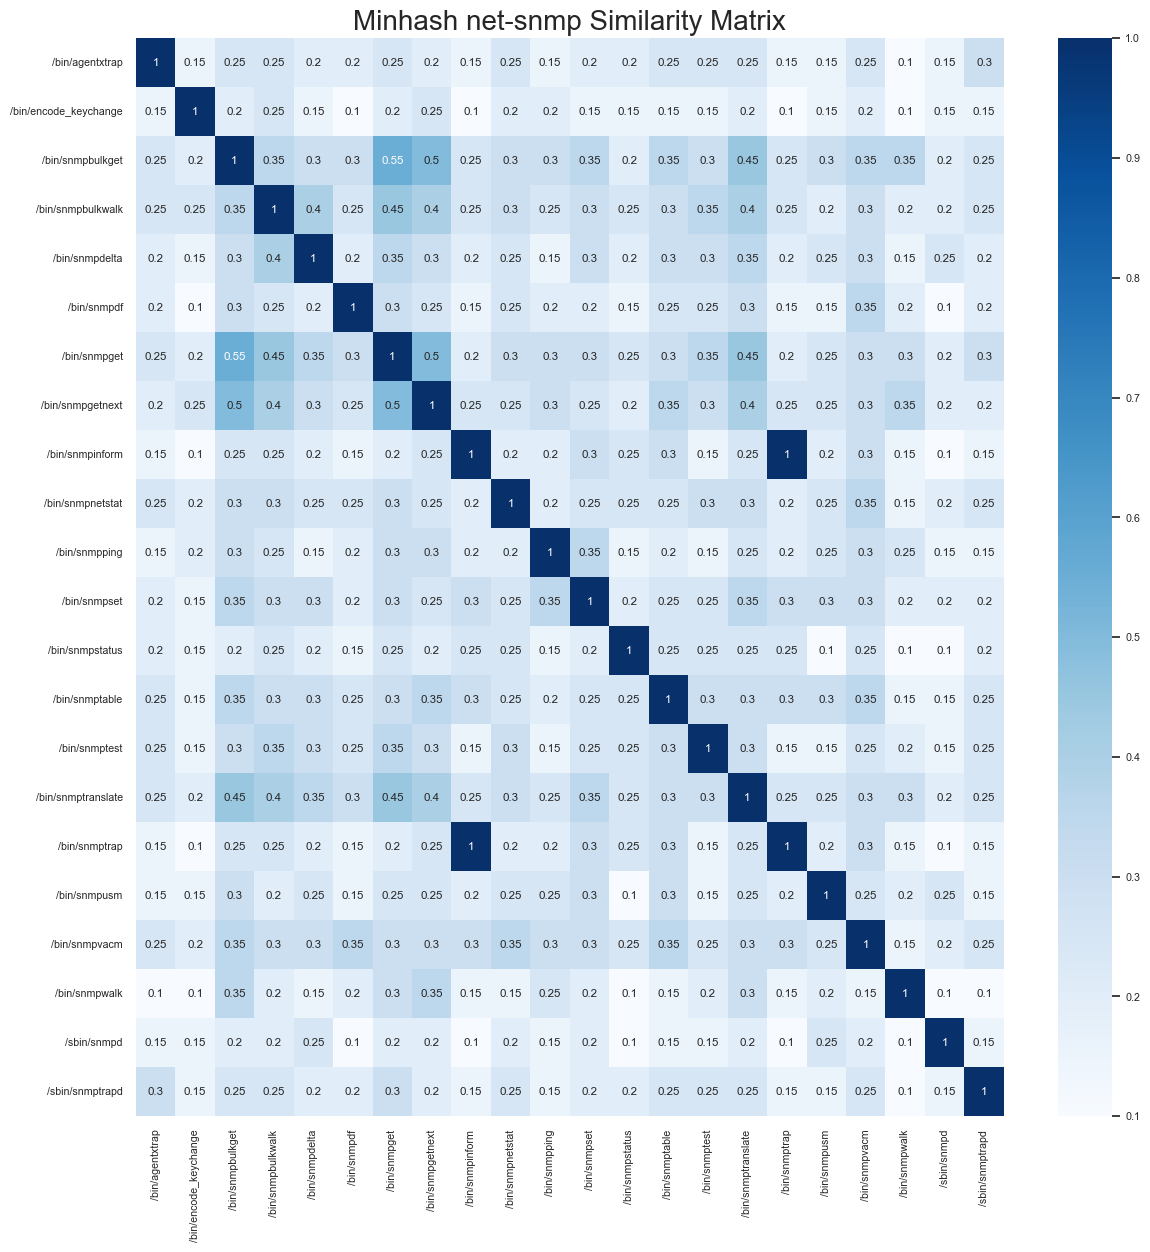

In [25]:
show_similarity_matrix(minhash_similarities, binaries, 'Minhash net-snmp Similarity Matrix')

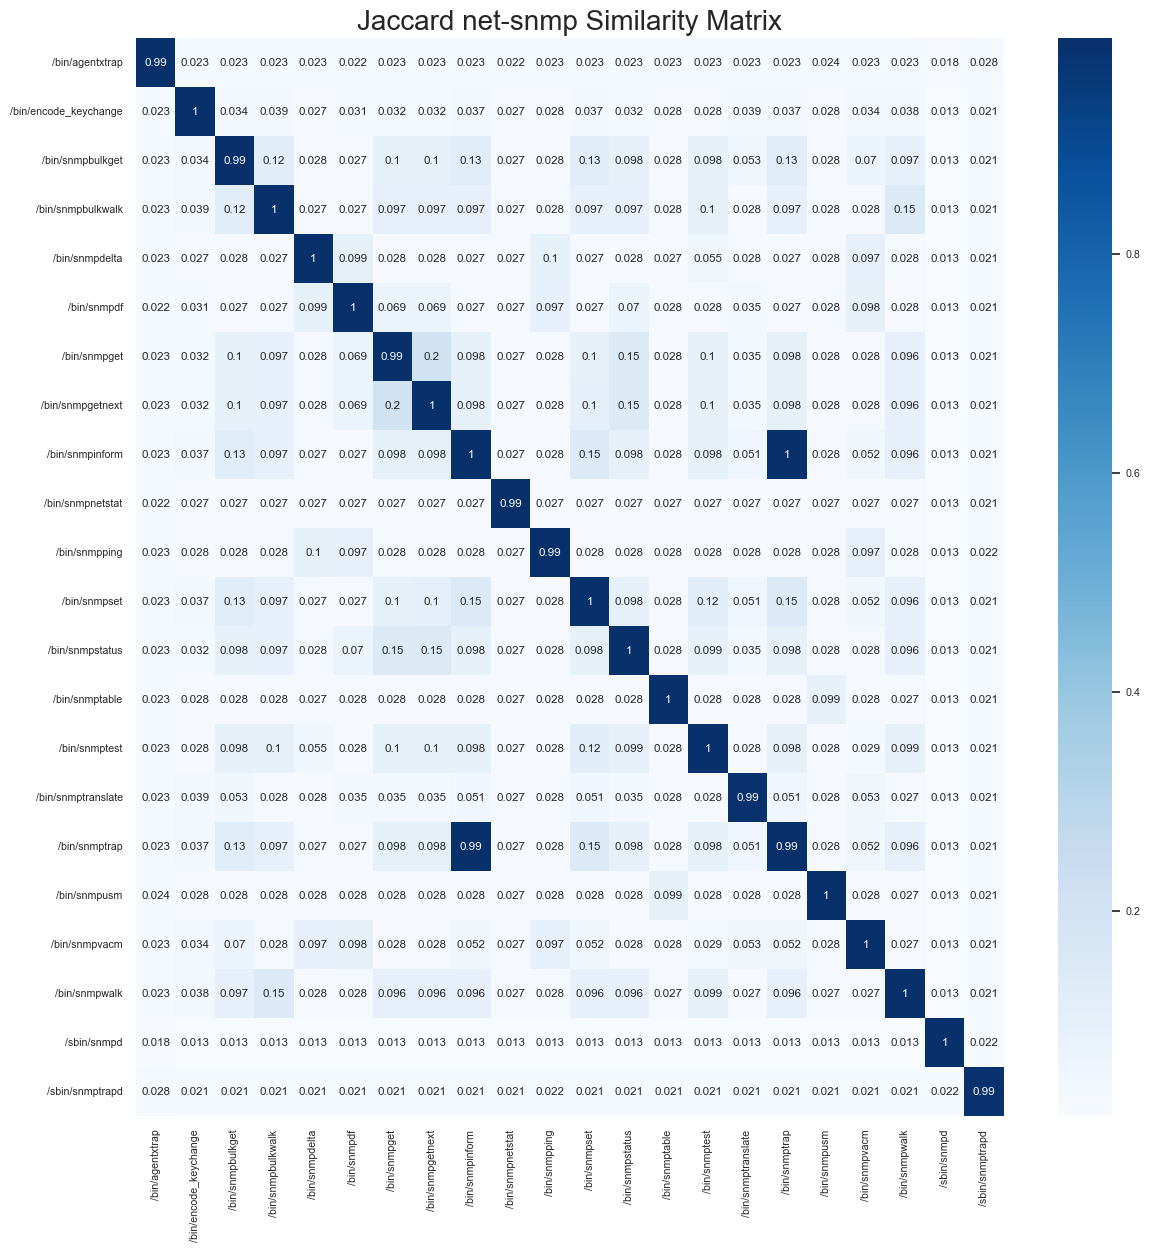

In [24]:
show_similarity_matrix(jaccard_similarities, binaries, 'Jaccard net-snmp Similarity Matrix')

In [55]:
from hashashin.utils import minhash_similarity, jaccard_similarity, load_hash
from tqdm import tqdm

self_minhash_similarities = np.zeros((len(binaries), len(binaries)))
self_jaccard_similarities = np.zeros((len(binaries), len(binaries)))

print(f"Computing similarity matrix for net-snmp:")
print(",".join(binaries))
print()
for i, j in tqdm(
    np.ndindex(len(binaries), len(binaries)), total=len(binaries) ** 2
):
    a = f"{BINARY_DIR}/net-snmp/v5.9.2/{binaries[i]}"
    b = f"{BINARY_DIR}/net-snmp/v5.9.2/{binaries[j]}"
    sig_a, feat_a = load_hash(a, generate=False, progress=False)
    sig_b, feat_b = load_hash(b, generate=False, progress=False)
    self_minhash_similarities[i, j] = minhash_similarity(sig_a, sig_b)
    self_jaccard_similarities[i, j] = jaccard_similarity(feat_a, feat_b)


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [00:11<00:00, 42.49it/s]


In [56]:
minhash_metrics = compute_metrics(self_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(self_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


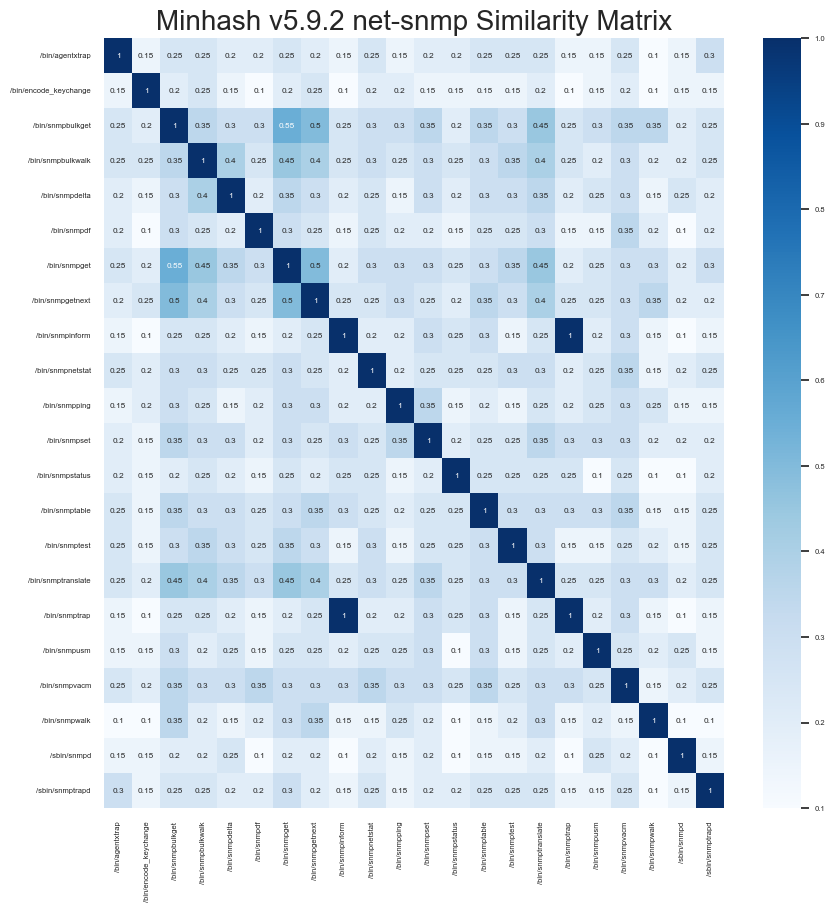

In [18]:
show_similarity_matrix(self_minhash_similarities, binaries, 'Minhash v5.9.2 net-snmp Similarity Matrix')

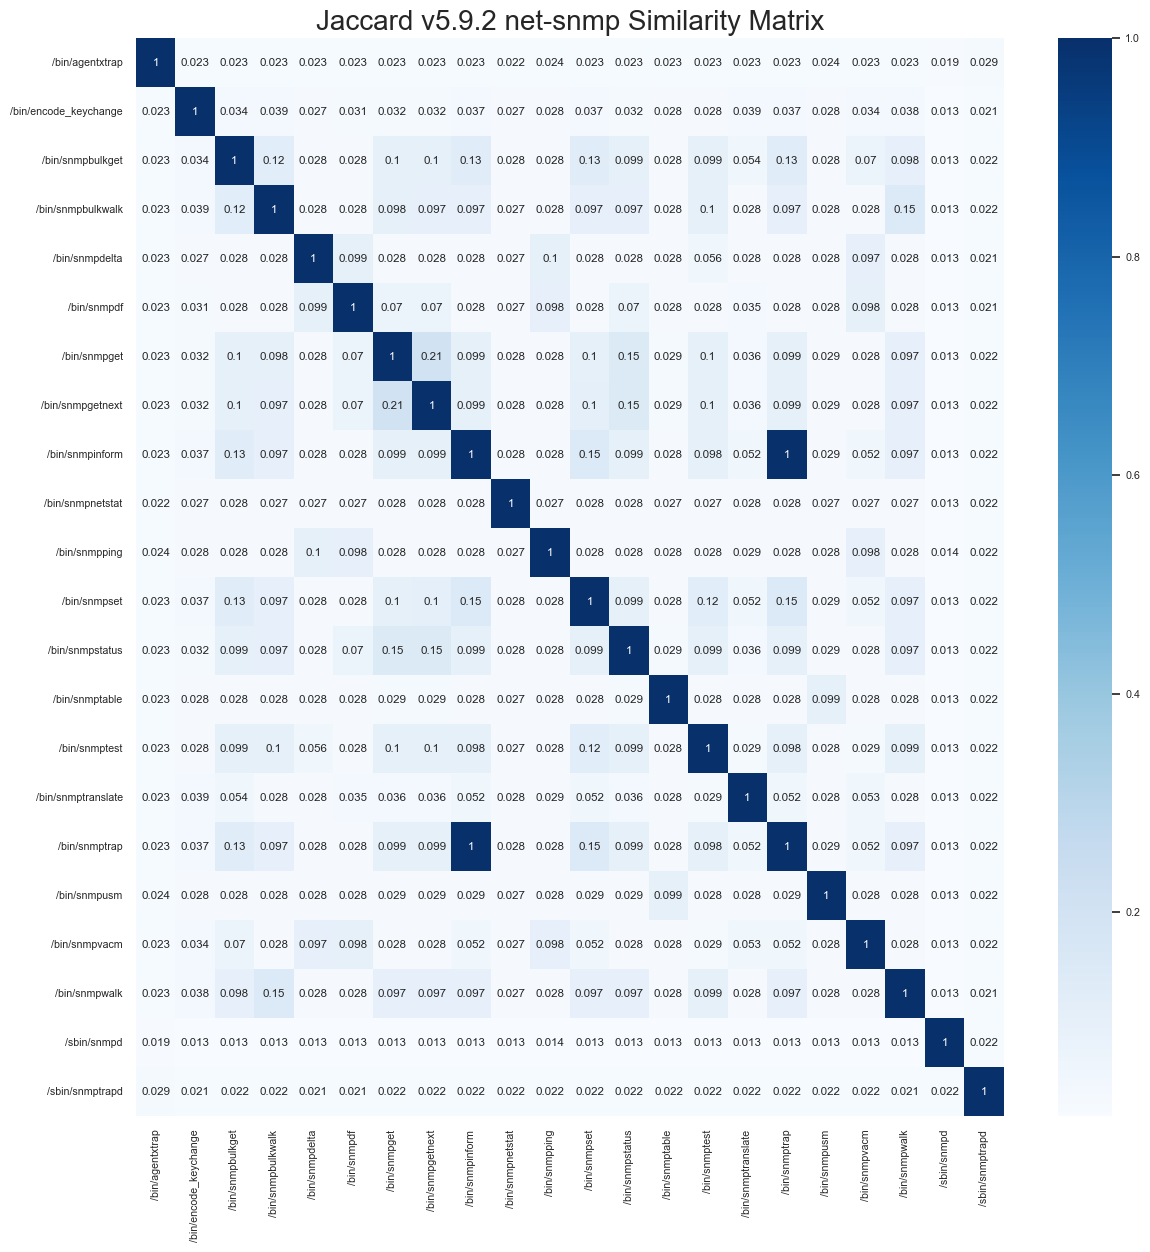

In [23]:
show_similarity_matrix(self_jaccard_similarities, binaries, 'Jaccard v5.9.2 net-snmp Similarity Matrix')

# openssl version comparison

In [46]:
from hashashin.lsh_tests import compute_single_bin_matrices
openssl_minhash_similarities, openssl_jaccard_similarities, binaries = compute_single_bin_matrices("openssl", "openssl", generate=False, regenerate=False)
minhash_metrics = compute_metrics(openssl_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(openssl_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

100%|██████████| 36/36 [00:07<00:00,  5.13it/s]

Minhash precision: 1.0, recall: 1.0, f1: 1.0
Jaccard precision: 1.0, recall: 1.0, f1: 1.0


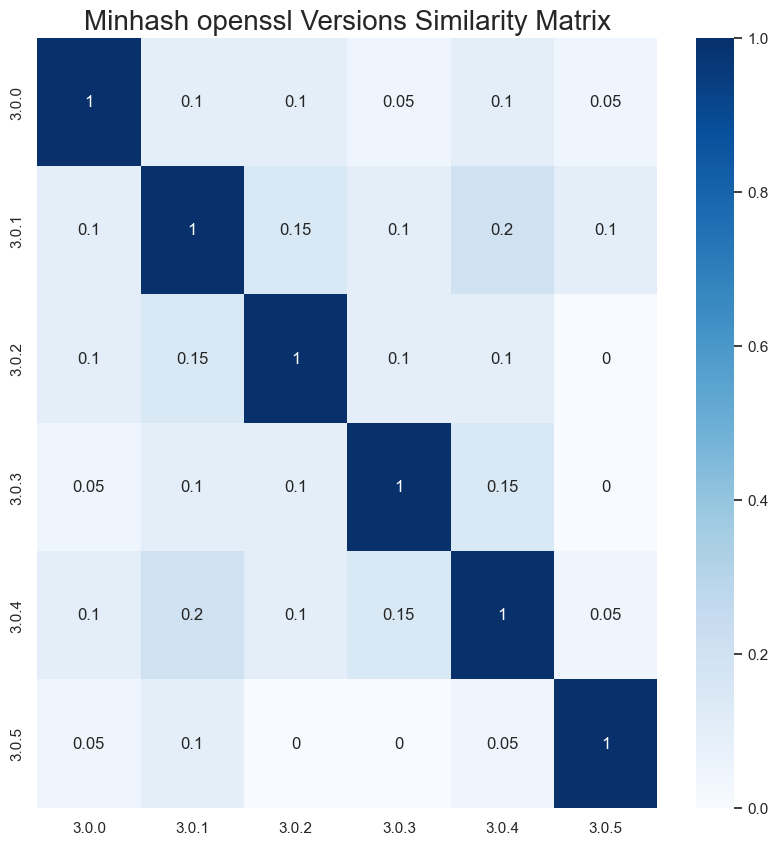

In [50]:
versions = [b.split("openssl-")[1].replace('/bin/openssl', '') for b in binaries]
show_similarity_matrix(openssl_minhash_similarities, versions, 'Minhash openssl Versions Similarity Matrix', figsize=(10, 10), font_scale=1)

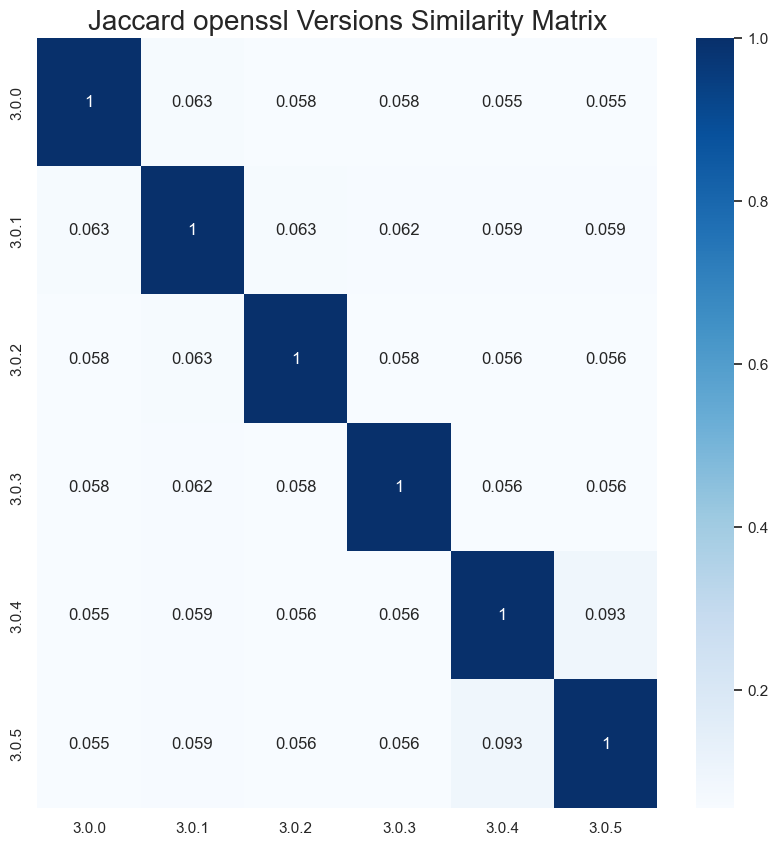

In [51]:
show_similarity_matrix(openssl_jaccard_similarities, versions, 'Jaccard openssl Versions Similarity Matrix', figsize=(10, 10), font_scale=1)

# /bin/curl comparison

In [36]:
from hashashin.lsh_tests import compute_single_bin_matrices
curl_minhash_similarities, curl_jaccard_similarities, binaries = compute_single_bin_matrices("libcurl", "curl", generate=False, regenerate=False)
minhash_metrics = compute_metrics(curl_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(curl_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

100%|██████████| 3364/3364 [01:02<00:00, 53.86it/s]

Minhash precision: 0.9898203592814371, recall: 1.0, f1: 0.9948841408365935
Jaccard precision: 0.9981884057971016, recall: 1.0, f1: 0.9990933816863101


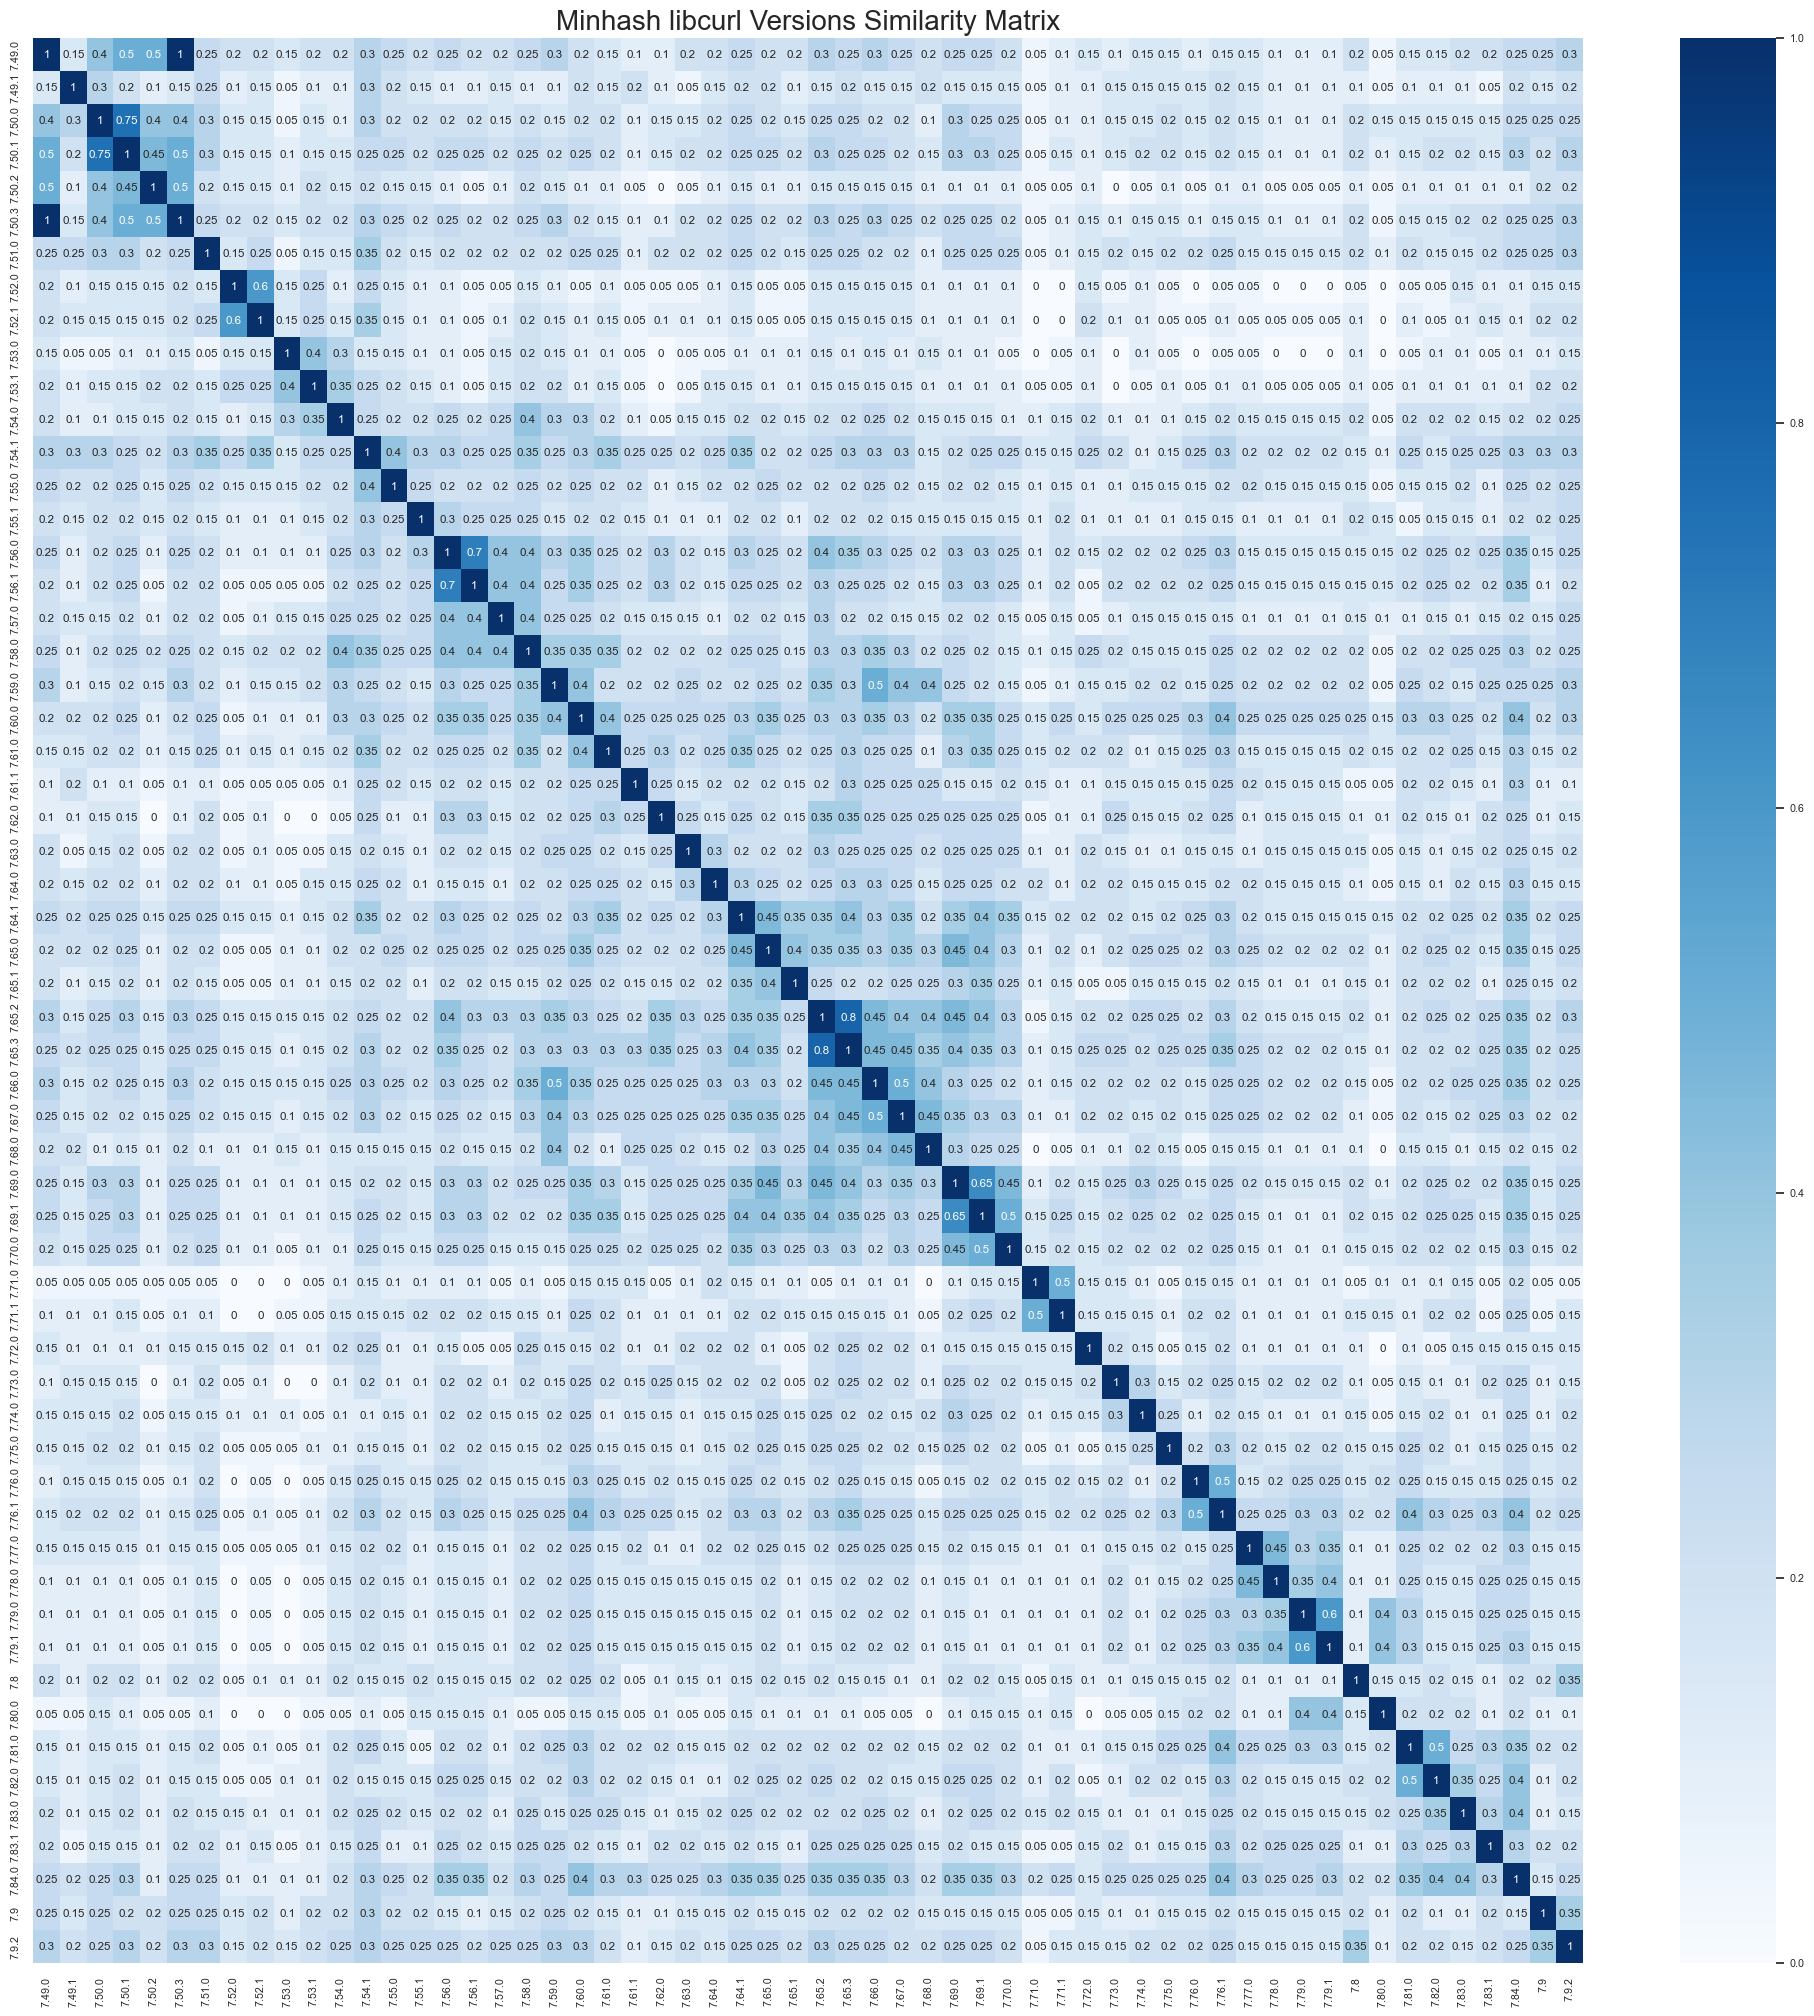

In [44]:
versions = [b.split("curl-")[1].replace('/bin/curl', '').replace('_','.') for b in binaries]
show_similarity_matrix(curl_minhash_similarities, versions, 'Minhash libcurl Versions Similarity Matrix', figsize=(25, 25))

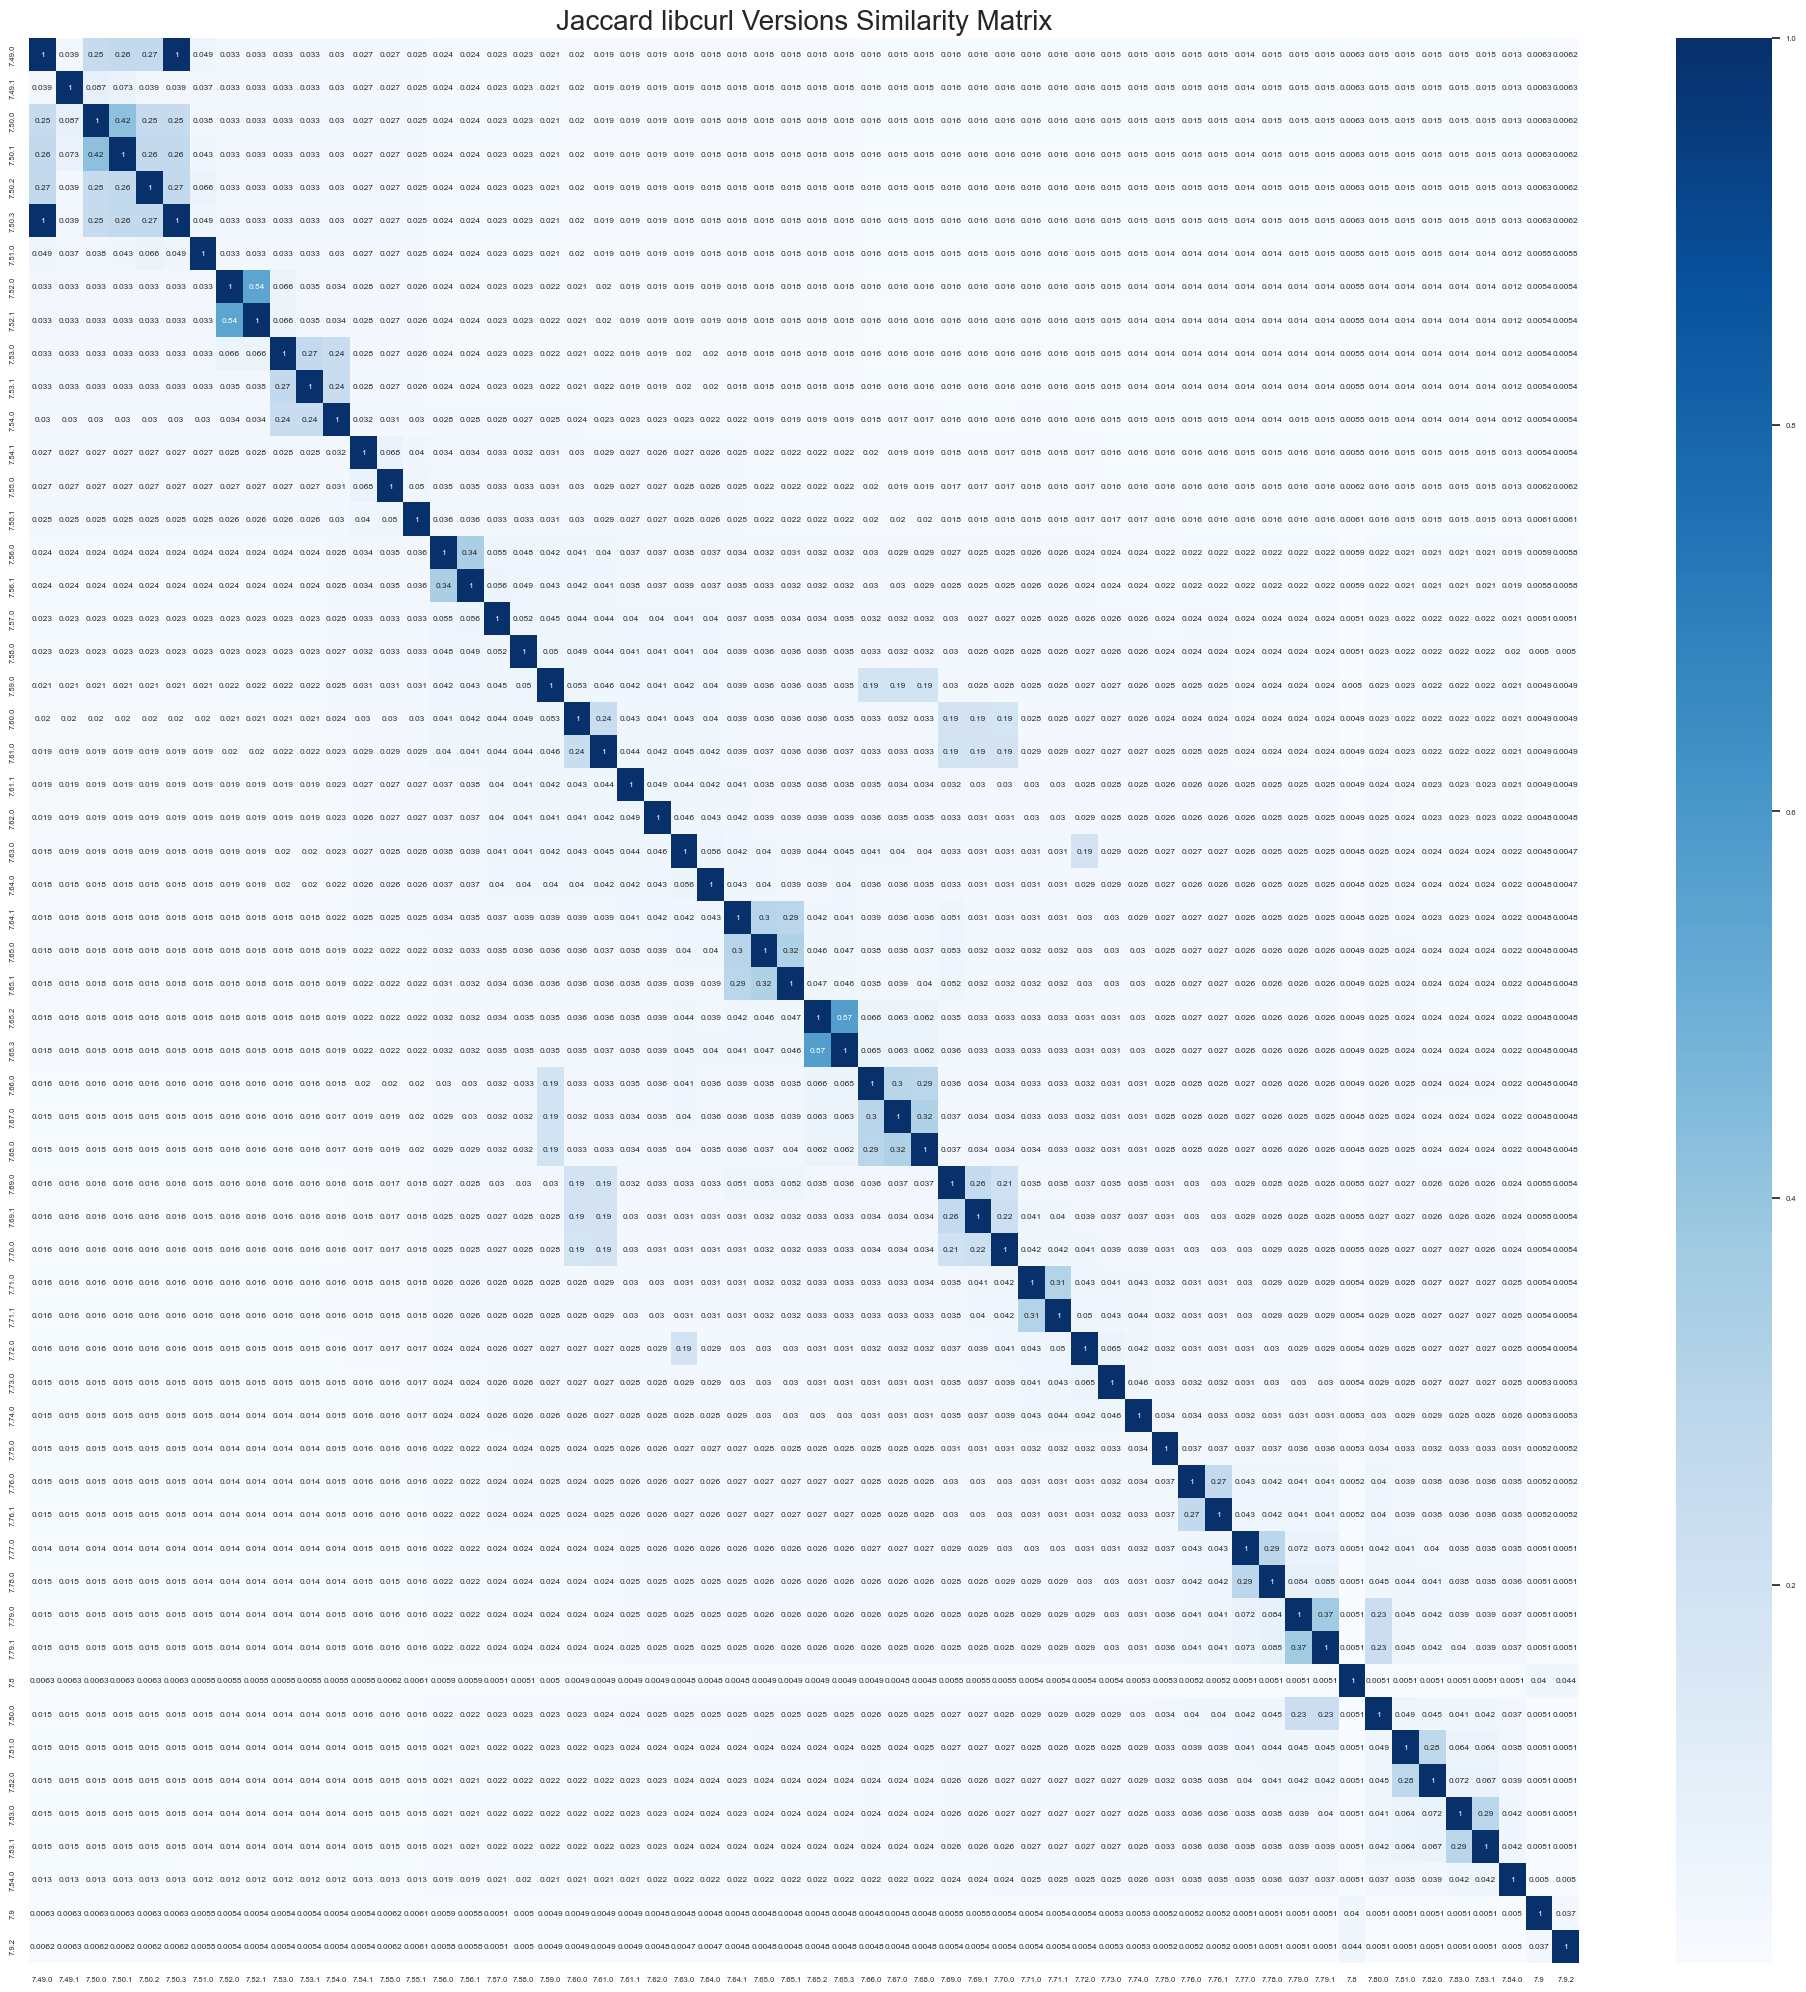

In [45]:
show_similarity_matrix(curl_jaccard_similarities, versions, 'Jaccard libcurl Versions Similarity Matrix', figsize=(25, 25), font_scale=0.5)

In [27]:
from hashashin.lsh_tests import compute_matrices
libcurl_minhash_similarities, libcurl_jaccard_similarities, binaries = compute_matrices("libcurl", generate=True, hash_progress=True, regenerate=False, version_paths="*7_[4,8][4,9]_0")
minhash_metrics = compute_metrics(libcurl_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(libcurl_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

Globbing /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/libcurl/*7_[4,8][4,9]_0
Hashing 1 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/libcurl/curl-7_49_0: ['/bin/curl']
Hashing 1 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/libcurl/curl-7_84_0: ['/bin/curl']


100%|██████████| 1478/1478 [00:12<00:00, 114.52it/s]
/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/utils.py:226: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return cache_hash(


Computing similarity matrix for libcurl:
/bin/curl



100%|██████████| 1/1 [00:00<00:00, 22.43it/s]

Minhash precision: nan, recall: 0.0, f1: nan
Jaccard precision: nan, recall: 0.0, f1: nan



/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/lsh_tests.py:44: RuntimeWarning: invalid value encountered in long_scalars
  tn = (np.sum(similarity_matrix < 0.5) - np.trace(similarity_matrix < 0.5)) / (
/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/lsh_tests.py:47: RuntimeWarning: invalid value encountered in long_scalars
  fp = (np.sum(similarity_matrix >= 0.5) - np.trace(similarity_matrix >= 0.5)) / (


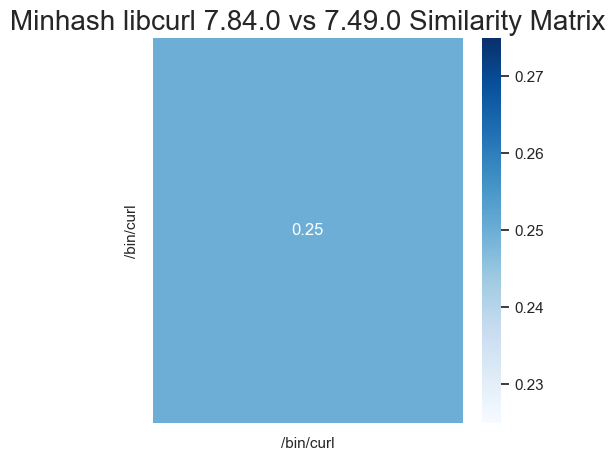

In [28]:
show_similarity_matrix(libcurl_minhash_similarities, binaries, 'Minhash libcurl 7.84.0 vs 7.49.0 Similarity Matrix', figsize=(5, 5), font_scale=1)

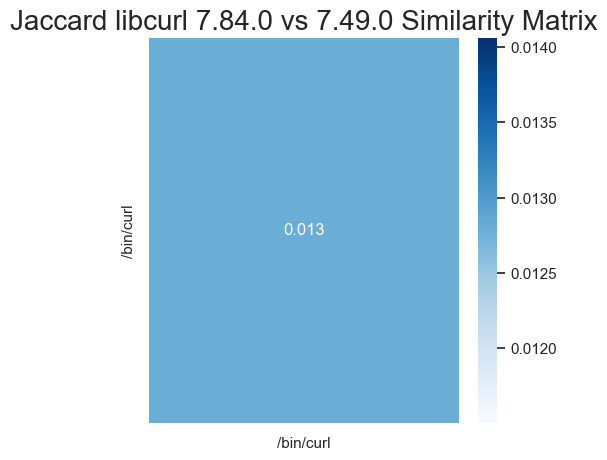

In [29]:
show_similarity_matrix(libcurl_jaccard_similarities, binaries, 'Jaccard libcurl 7.84.0 vs 7.49.0 Similarity Matrix', figsize=(5, 5), font_scale=1)

In [2]:
minhash_similarities, jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=True)
show_similarity_matrix(minhash_similarities, binaries)

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3


 32%|███▏      | 7/22 [00:00<00:00, 66.80it/s]

Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmptranslate (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpset (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpdelta (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpinform (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpdf (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpstatus (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpusm (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp

100%|██████████| 22/22 [00:00<00:00, 59.90it/s]

Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpget (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmptable (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpbulkget (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpping (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmpwalk (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmptest (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/sbin/snmpd (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2


 36%|███▋      | 8/22 [00:00<00:00, 70.66it/s]

Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmptranslate (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpset (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpdelta (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpinform (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpdf (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpstatus (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpusm (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp

100%|██████████| 22/22 [00:00<00:00, 61.24it/s]


Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpget (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmptable (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpbulkget (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpping (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmpwalk (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/bin/snmptest (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2/sbin/snmpd (already exists)
Skipping /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9

100%|██████████| 484/484 [00:20<00:00, 23.96it/s]


NameError: name 'show_similarity_matrix' is not defined